# Data Acquisition ⚛

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target # Search the organism or protein (can be done in chembl manually)
target_query = target.search("alzheimer")
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q92542', 'xref_name': None, 'xre...",Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
selected_target = targets.target_chembl_id[5] #bioactivity of Amyloid-beta A4 in human ( index 5 and gives the unique id of the target)
selected_target

'CHEMBL2487'

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type='IC50') ## Only bioactivity data for Amyloid-beta 4 that are reported as [IC50 values (nanomolar) - concentration of a substance that is required to inhibit a biological function by 50%.]

In [5]:
type(res)

chembl_webresource_client.query_set.QuerySet

In [6]:
#pd.set_option('display.max_columns', None)
#pd.set_option
df_bioactivity_data = pd.DataFrame.from_dict(res)
df_bioactivity_data


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079667,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.03
1599,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079668,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.99
1600,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079669,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.1
1601,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079670,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.56


In [7]:
df_bioactivity_data.standard_type.unique() # check all IC50s

array(['IC50'], dtype=object)

In [8]:
df_bioactivity_data.standard_value.unique() #check the type they are strings


array(['5000.0', '2700.0', '1800.0', '11000.0', '10000.0', '305000.0',
       '75000.0', None, '77000.0', '94000.0', '21000.0', '46000.0',
       '129000.0', '83000.0', '67000.0', '210000.0', '41000.0', '35000.0',
       '-1.0', '111000.0', '22000.0', '14000.0', '96300.0', '-5.0',
       '101000.0', '70600.0', '31600.0', '409000.0', '33600.0', '57900.0',
       '81000.0', '17700.0', '114000.0', '64000.0', '12000.0', '20000.0',
       '280000.0', '6700.0', '5.2', '6000.0', '9900.0', '740.0', '180.0',
       '200.0', '6800.0', '3000.0', '74.0', '30.0', '160.0', '17.0',
       '152.0', '54.0', '29.0', '15.0', '530.0', '16.0', '140.0', '120.0',
       '540.0', '450.0', '650.0', '600.0', '73.0', '60.0', '360.0',
       '190.0', '900.0', '1000.0', '680.0', '880.0', '780.0', '1900.0',
       '86.0', '280.0', '220.0', '0.3', '56.0', '47.0', '46.0', '14.0',
       '12.0', '27.0', '3.5', '2.5', '2.8', '2.4', '81.0', '6.9', '9.6',
       '25.0', '10.0', '13.0', '9.0', '28.0', '3.2', '104.0', '57.

In [9]:
numeric = pd.to_numeric(df_bioactivity_data['standard_value'], errors='coerce')

min_value = numeric.min()

min_row = df_bioactivity_data[numeric == min_value]

min_value, min_row # check for min the standard_value (If we can inihibit by 50% with a lower concentration it means it has great power cuz we need less concentration to inhibit)

(-5.0,
    action_type activity_comment  activity_id activity_properties  \
 39        None             None      1606122                  []   
 
    assay_chembl_id                                  assay_description  \
 39    CHEMBL856813  Concentration required to inhibit A beta 40 pe...   
 
    assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
 39          B                    None                   None  BAO_0000190   
 
     ... target_organism         target_pref_name target_tax_id text_value  \
 39  ...    Homo sapiens  Amyloid-beta A4 protein          9606       None   
 
     toid  type units    uo_units upper_value value  
 39  None  IC50     %  UO_0000187        None  -5.0  
 
 [1 rows x 46 columns])

In [10]:
df_bioactivity_data.to_csv('bioactivity_data.csv', index = False) #CSV FILE bioactivity data

In [11]:
import os
print(os.getcwd())

/Users/bm_castro/Desktop/bioinformatics


# Preprocess Data 🧹

In [12]:
df_hmiss = df_bioactivity_data[df_bioactivity_data.standard_value.notna()] #missingvalues for the standard values and canonical smiles
df_hmiss = df_hmiss[df_bioactivity_data.canonical_smiles.notna()]
df_hmiss

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/1839554273.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hmiss = df_hmiss[df_bioactivity_data.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079667,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.03
1599,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079668,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.99
1600,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079669,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.1
1601,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079670,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.56


In [13]:
len(df_hmiss.canonical_smiles.unique())

1188

In [14]:
df_drop = df_hmiss.drop_duplicates(["canonical_smiles"])
df_drop

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079667,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.03
1599,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079668,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.99
1600,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079669,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.1
1601,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25079670,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255354,Inhibition of Amyloid beta (1 to 42) (unknown ...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.56


In [15]:
selection = ["molecule_chembl_id", "canonical_smiles", "standard_value"]
df_preprocessed = df_drop[selection]
df_preprocessed

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1598,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0
1599,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0
1600,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0
1601,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0


In [16]:
df_preprocessed.to_csv("bioactivity_data_preprocessed.csv", index = False) #store the file

***

In [17]:
df_labeling = pd.read_csv("bioactivity_data_preprocessed.csv")

In [18]:
bioactivity_class = [] #labeling as active or inactive based on bioactivity data
for i in df_labeling.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermidiate")


In [19]:
df_labeling.molecule_chembl_id

0        CHEMBL311039
1        CHEMBL450926
2        CHEMBL310242
3         CHEMBL74874
4         CHEMBL75183
            ...      
1183    CHEMBL5274298
1184    CHEMBL5283067
1185    CHEMBL5273520
1186    CHEMBL5282081
1187    CHEMBL5274654
Name: molecule_chembl_id, Length: 1188, dtype: object

In [20]:
mol_cid = []
for i in df_labeling.molecule_chembl_id:
    mol_cid.append(i)

In [21]:
canonical_smiles = []
for i in df_labeling.canonical_smiles:
    canonical_smiles.append(i)

In [22]:
standard_value = []
for i in df_labeling.standard_value:
    standard_value.append(i)

In [23]:
data_tuples = list(zip(mol_cid, canonical_smiles, standard_value, bioactivity_class,))
df_features = pd.DataFrame(data_tuples, columns=['mol_cid', 'canonical_smiles', 'standard_value', 'bioactivity_class'])
df_features
#new dataframe is structured to contain information about drug candidates (molecule IDs, chemical structures, bioactivity values, and bioactivity classes) that are being evaluated for their interaction with the Amyloid-beta A4 protein

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermidiate
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermidiate


In [24]:
df_features.to_csv('bioactivity_data_features_processed.csv', index = False)

In [25]:
df_features

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermidiate
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermidiate


### Treat the smiles 👨🏻‍🔬: drop the canonical smile column? why? Canonical smiles might have multicomponent compounds, salts which are considered molecular fragments and they are separated by "." .
- There is an assumption tho: Essentially these fragments are considered the smaller part of the structure thus, they will be discarded.
- What remains is a list with the bigger fragment (the main and bigger structure)

In [26]:
df_drop_smiles = df_features.drop(columns='canonical_smiles')

In [27]:
smiles=[]

for i in df_features.canonical_smiles.to_list():
    fragment = str(i).split('.') #goes throught each smile converting into a string and splitting by "." (como explicado antes por causa dos fragmentos)
    fragment_long = max(fragment, key = len) #biggest fragment
    smiles.append(fragment_long) #added to smiles

smiles = pd.Series(smiles, name="canonical_smiles") 


In [28]:
df_smiles_cleaned = pd.concat([df_drop_smiles, smiles], axis = 1) #all concatenated again cleaned
df_smiles_cleaned

,mol_cid,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL311039,5000.0,intermidiate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermidiate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermidiate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1183,CHEMBL5274298,1030.0,intermidiate,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...
1184,CHEMBL5283067,990.0,active,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...
1185,CHEMBL5273520,100.0,active,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...
1186,CHEMBL5282081,1560.0,intermidiate,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...


### 💊 Lipinski's "Rule of Five" is a set of guidelines used to evaluate the druglikeness of a compound, specifically for oral bioavailability. It assesses four main parameters that are important for drug absorption and distribution.
- Molecular Weight: Should be less than 500 Daltons.
- LogP (Octanol-water partition coefficient): Should be less than 5, indicating acceptable lipophilicity.
- Hydrogen Bond Donors: Should be fewer than 5.
- Hydrogen Bond Acceptors: Should be fewer than 10.

In [29]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [30]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #Smiles sao strings que nao sao manipulaveis para calculaçoes (i.e molecularweight, logP...) entao
                                       # o que se faz é converter atraves da funçao MolFromSmiles os smiles/strings (elem) em "mol" Object para haver manipulaçao dos dados 
        moldata.append(mol)
       
    baseData= np.arange(1,1) #empty array
    i=0 #tracking number of iterations
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol) #usa descriptor module para calcular molweight e logp
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)# aqui usa o lipinski module
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   #adicionar tudo na mesma array
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])  #vai dando stack verticalmente adicionando novas rows
        i=i+1      
    # no final o que temos é uma array 2D onde cada row representa os descriptors de uma molecula (i.e: molecular weight.... de uma molecula (0=C=0...))
    #na verdade 
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [31]:
df_lipinski = lipinski(df_smiles_cleaned.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1183,510.448,-0.85390,7.0,13.0
1184,680.640,4.43222,6.0,15.0
1185,624.620,5.52076,7.0,13.0
1186,552.491,4.81824,4.0,10.0


In [32]:
df_features

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermidiate
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermidiate


In [33]:
df_combined = pd.concat([df_features, df_lipinski], axis = 1)

In [34]:
df_combined

,mol_cid,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermidiate,510.448,-0.85390,7.0,13.0
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active,680.640,4.43222,6.0,15.0
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active,624.620,5.52076,7.0,13.0
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermidiate,552.491,4.81824,4.0,10.0


In [35]:
df_combined.shape

(1188, 8)

### 🔢 Conversion of IC50 into pIC50
- Convert nM to M (multiplying by 10^-9)
- -log10(IC50)(negative logarithm)
- Delete standard_value and create a pIC50 column.

In [36]:
df_combined.standard_value.describe() #podemos perceber pelo output que o numero é gigante. Se o numero for muito elevado na escala logaritimica ele fica negativo
                                    # entao temos de dar cap num certo valor

count    1.188000e+03
mean     2.334128e+04
std      8.556325e+04
min     -1.000000e+00
25%      1.790000e+02
50%      3.865000e+03
75%      1.711750e+04
max      1.655000e+06
Name: standard_value, dtype: float64

####Note: some large values need to be capped (fixed ate one number) otherwise they would become negative for Amyloide-beta A4

In [37]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 1000000000:
            i=1000000000
        norm.append(i)
        
    input["standard_value_norm"] = norm
    x = input.drop("standard_value",axis=1)
    
    return x

In [38]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        M = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(M))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

In [39]:
df_norm = norm_value(df_combined)
df_norm

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermidiate,510.448,-0.85390,7.0,13.0,1030.0
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,990.0
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,100.0
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermidiate,552.491,4.81824,4.0,10.0,1560.0


In [40]:
df_pIC50 = pIC50(df_norm)
df_pIC50

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/249768756.py:8: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(M))


,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermidiate,510.448,-0.85390,7.0,13.0,5.987163
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermidiate,552.491,4.81824,4.0,10.0,5.806875


In [41]:
df_pIC50.pIC50.describe()

count    1187.000000
mean        5.764696
std         1.336165
min         2.781202
25%         4.765613
50%         5.412289
75%         6.744727
max         9.522879
Name: pIC50, dtype: float64

In [42]:
df_pIC50.to_csv("bioactivity_data_pIC50.csv")

In [43]:
df_active_inactive = df_pIC50[df_pIC50['bioactivity_class'] != 'intermidiate'].reset_index(drop=True) #just 2 classes to make it easier
df_active_inactive

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
1,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
2,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
3,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
4,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
858,CHEMBL5290033,Cc1ccc(NCC[C@@H]2CCCN3CCCC[C@H]23)c2c(=O)c3ccc...,inactive,390.527,5.32112,1.0,4.0,4.886057
859,CHEMBL5283881,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)C[C@@H](O)[C...,active,671.879,5.56660,4.0,6.0,7.318759
860,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
861,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000


***

# Exploratory Data Analysis (EDA) (Chemical space analysis) 🧪

In [44]:
import seaborn as sns
sns.set_theme(style='ticks')
import matplotlib.pyplot as plt

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/1768260193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bioactivity_class", data=df_active_inactive, edgecolor = "black", palette= "Set2")


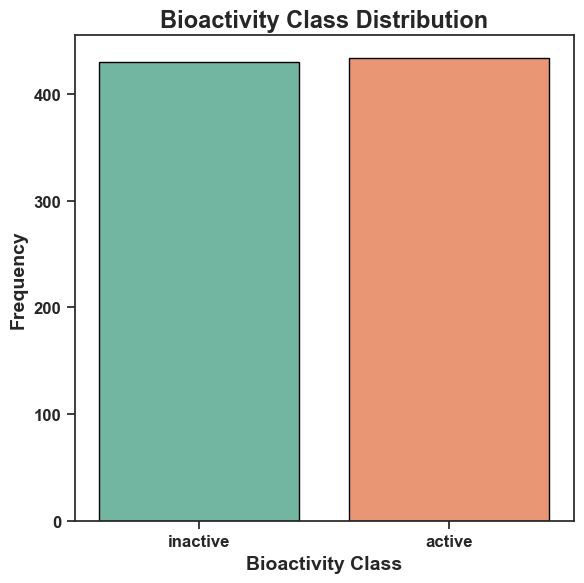

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x="bioactivity_class", data=df_active_inactive, edgecolor = "black", palette= "Set2")

plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")
plt.title("Bioactivity Class Distribution", fontsize= 17, fontweight= "bold")

plt.xticks(fontsize = 12, fontweight= "bold")
plt.yticks(fontsize=12, fontweight = "bold")

plt.tight_layout()
plt.savefig("plot_bioactivity_class_distribution.pdf")

plt.show()

In [46]:
df_active_inactive['bioactivity_class'].value_counts()['active']

433

In [47]:
df_active_inactive['bioactivity_class'].value_counts()['inactive']

430

#### MW vs LogP (lets check for trends - clusters, liophility and molecularsize relation)

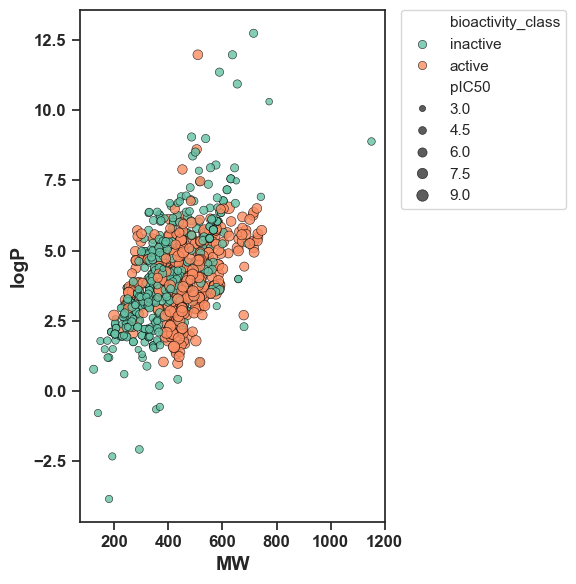

In [48]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="MW", y="LogP", data=df_active_inactive, edgecolor = "black", palette= "Set2", size='pIC50', hue="bioactivity_class", alpha=0.8)

plt.xlabel("MW", fontsize = 14, fontweight = "bold")
plt.ylabel("logP", fontsize = 14, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.xticks(fontsize = 12, fontweight= "bold")
plt.yticks(fontsize=12, fontweight = "bold")

plt.tight_layout()
plt.savefig("plot_MW_logP.pdf")

plt.show()

### Similar inactive and active cluster
### Inactive Compoundsare
-   Generally dispersed across different areas.
-   Main clustering occurs within the optimal Lipinski rule conditions.
### Active Compounds:
- Form a well-defined cluster with minimal dispersion.
- Cluster closely resembles that of inactive compounds.
- LogP values for most are well-positioned below 5.
- Molecular weight generally falls below 500 Daltons, though visibility could improve with more consistent adherence to this limit.

### Boxplots de pIC50

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/3025556724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_active_inactive, palette= "Set2")


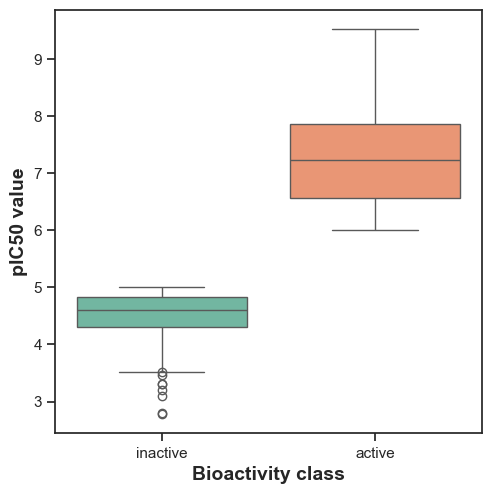

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_active_inactive, palette= "Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50.pdf')

- Show some outliers, while the active compounds are consistent and well-behaved, indicating that the bioactivity thresholds we set (e.g., IC50 < 1000 implies pIC50 > 5) are effective.
- The active compounds have notably higher pIC50 values compared to the inactive ones, which means they are more potent. This is due to the inverse relationship between IC50 and pIC50 values.

### Mann-Whitney U test for the statistical analysis (normality distribution p<0.05 they are different) 

In [50]:
def mannwhitney(descriptor, verbose=False):
  
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df_man = df_active_inactive[selection]
  active = df_man[df_man['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_man = df_active_inactive[selection]
  inactive = df_man[df_man['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [51]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


In [52]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,119998.0,2.017137e-13,0.05,Different distribution (reject H0)


In [53]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,98977.5,0.108164,0.05,Same distribution (fail to reject H0)


In [54]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,75564.0,7.287576e-07,0.05,Different distribution (reject H0)


In [55]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,118578.0,1.645117e-12,0.05,Different distribution (reject H0)


/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/4135341525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_active_inactive, palette="Set2")


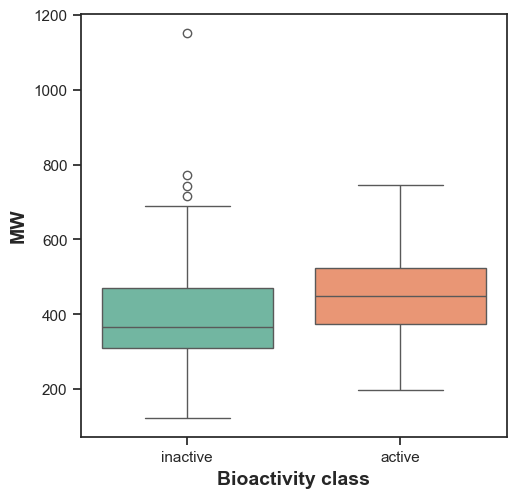

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/3548988316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_active_inactive, palette="Set2")


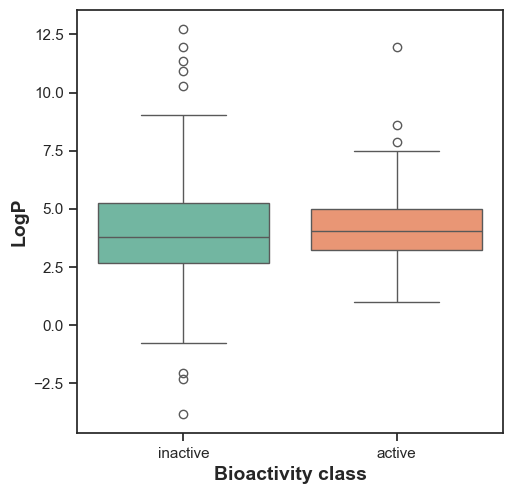

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/2663554997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_active_inactive, palette="Set2")


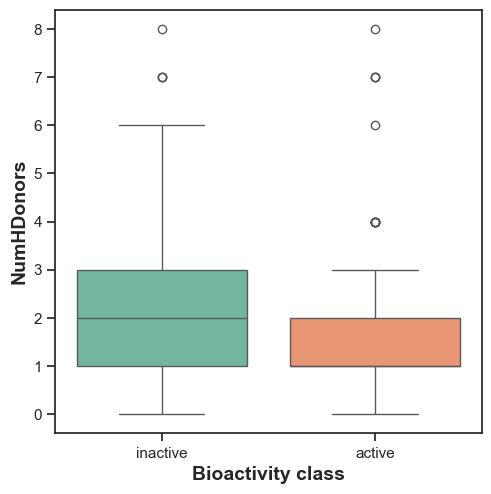

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/2086055184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_active_inactive, palette="Set2")


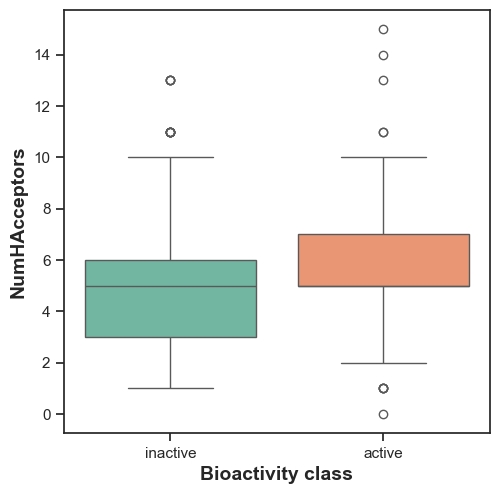

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

### Some conclusions must be adressed: there are outliers, everything is statistically different minus logP which can suggest that solubility might not be that important and maybe polar interactions are prefered (HDonors and Acceptors). 

***


# Generate Descriptors and Molecular Fingerprints 🐾 0️⃣ 1️⃣

In [60]:
import os
os.environ['PATH'] = '/opt/homebrew/bin:' + os.environ['PATH']

In [ ]:
!wget --version

In [ ]:
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
! unzip padel.zip

In [61]:
df_pIC50

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermidiate,510.448,-0.85390,7.0,13.0,5.987163
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermidiate,552.491,4.81824,4.0,10.0,5.806875


In [ ]:
df_active_inactive

In [ ]:
select = ['canonical_smiles', 'mol_cid']
df_select = df_pIC50[select]
df_select.to_csv("molecule.smi", sep='\t', index = False, header=False)


In [ ]:
! cat molecule.smi | head -5

In [ ]:
! cat molecule.smi | wc -l

***


# PaDEL descriptor Software (java,homebrew....)

In [ ]:
! cat padel.sh #Remove (NaCl), Present nitro groups,
#PubChem fingerprints  (Binary representations)

In [ ]:
! bash padel.sh

In [ ]:
! ls -l

- Essentially, each column in the dataframe represents a specific structural feature defined by PubChem (e.g., PubchemFP0 might indicate the presence of a certain type of ring structure). The values are binary, where "1" indicates the presence of that feature, and "0" indicates its absence

***

# Finally setting up data for the model 𝄃 ⊞

In [ ]:
df_reald_X = pd.read_csv("descriptors_output.csv")
df_reald_X

- Essentially, each column represents a specific structural feature defined by PubChem (e.g., PubchemFP0 might indicate the presence of a certain type of ring structure). The values are binary, where "1" indicates the presence of that feature, and "0" indicates its absence.

In [ ]:
df_reald_X = df_reald_X.drop(columns=["Name"]) #dropar name para nao ser biased
df_reald_X

In [ ]:
df_Y = df_pIC50["pIC50"] #definir a nossa target
df_Y

In [ ]:
realdataset = pd.concat([df_reald_X, df_Y], axis=1)
realdataset

In [ ]:
realdataset.to_csv("amyloydbetaA4_3classes_bioactivitydata_pIC50_pubchemfingerprint.csv", index= False)

***


# ML Models 🦾

In [ ]:
df_pIC50["bioactivity_class"].value_counts()

In [62]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

import optuna


In [ ]:
df_model = pd.read_csv("amyloydbetaA4_3classes_bioactivitydata_pIC50_pubchemfingerprint.csv")
df_model

In [ ]:
X = df_model.drop("pIC50" , axis = 1)
X

In [ ]:
Y = df_model["pIC50"]
Y

In [ ]:
X.shape

In [ ]:
Y.shape

# ML pipeline

- Feature Selection (should always be done after splitting (cuz of data leakage) but the feature selection method is simple in this first experience phase)

In [ ]:
from sklearn.feature_selection import VarianceThreshold ### For the case of variance threshold we dont need to be rigorous on whethre to apply it
#before data splitting or after. Other feature selection techniques mightprovide data leakage
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

### Data split (80/20)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

In [ ]:
Y_train = Y_train.fillna(Y_train.median()) #just filled with the median on missing values  (not the best option we should drop the row but well)

In [ ]:
print("Missing values in X_train:", np.isnan(X_train).sum())  # Count of missing values in X_train


In [ ]:

print("Missing values in y_train:", np.isnan(Y_train).sum())  # Count of missing values in Y_train

### Optuna 🌀 and 10foldCV during training

In [ ]:
model_classes = {
    "RandomForestRegressor": RandomForestRegressor,
    "GradientBoostingRegressor": GradientBoostingRegressor,
    "LinearRegression": LinearRegression,
    "XGBRegressor": XGBRegressor,
    "KNeighborsRegressor": KNeighborsRegressor,
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor
}

In [ ]:
# Define the objective function for Optuna with all the parameters
def objective(trial, model_type):
    print(f"Evaluating model_type: {model_type}")
    np.random.seed(42)
    if model_type == RandomForestRegressor:
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
        # Create a RandomForest model with the hyperparameters
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
        )
    elif model_type == GradientBoostingRegressor:
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        
        model = GradientBoostingRegressor(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
    elif model_type == LinearRegression:
        fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

        model = LinearRegression(
            fit_intercept=fit_intercept,
        )
    elif model_type == XGBRegressor:
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 3, 30)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
        gamma = trial.suggest_loguniform('gamma', 0.0001, 10.0)
        reg_alpha = trial.suggest_loguniform('reg_alpha', 0.0001, 10.0)
        reg_lambda = trial.suggest_loguniform('reg_lambda', 0.0001, 10.0)

        model = XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            random_state=42,
            n_jobs=-1
        )
    #elif model_type == SVR:
        #kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        #C = trial.suggest_loguniform('C', 0.1, 100)
        #epsilon = trial.suggest_loguniform('epsilon', 0.01, 1.0)
        #gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        #model = SVR(
            #kernel=kernel,
            #C=C,
            #epsilon=epsilon,
            #gamma=gamma
        
    elif model_type == KNeighborsRegressor:
        n_neighbors = trial.suggest_int('n_neighbors', 3, 50)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        leaf_size = trial.suggest_int('leaf_size', 10, 100)
        p = trial.suggest_int('p', 1, 5)

        model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            leaf_size=leaf_size,
            p=p,
            n_jobs=-1
        )
    elif model_type == HistGradientBoostingRegressor:
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        max_iter = trial.suggest_int('max_iter', 50, 500)
        max_depth = trial.suggest_int('max_depth', 3, 30)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
        l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-10, 10.0)
        loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error', 'poisson'])

        model = HistGradientBoostingRegressor(
            learning_rate=learning_rate,
            max_iter=max_iter,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_leaf_nodes=max_leaf_nodes,
            l2_regularization=l2_regularization,
            loss=loss,
            random_state=42
        )
    
    else:
        raise ValueError(f"Unknown model_type: {model_type}")
    
    
    # Cross-validate the model and return the mean score of 10 results for each trial
    cv_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2', error_score='raise')
    return np.mean(cv_scores)


In [ ]:
import mlflow
mlflow.set_experiment("AmyloidBeta-A4 ML") #tracking (better to do it cell by cell)

In [ ]:
for model_name, model_library in model_classes.items():
    with mlflow.start_run(run_name=f"ML_{model_name}"):
        mlflow.log_param("model_type", model_name)
        
        # Create and optimize the study
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, model_type=model_library), n_trials=30, n_jobs=-1)  # Adjust n_trials as needed
        
        best_params = study.best_params
        print(f"Best hyperparameters for {model_name}: {best_params}")  # Best hyperparameters
        
        mlflow.log_params(best_params)  # Log the best parameters
        
        # Instantiate and train the best model with the found hyperparameters
        best_model = model_library(**best_params)
        best_model.fit(X_train, Y_train)
        
        # Predict and evaluate on test data
        y_pred = best_model.predict(X_test)
        final_r2 = r2_score(Y_test, y_pred)
        final_mse = mean_squared_error(Y_test, y_pred) 
        
        # Log the evaluation metrics
        mlflow.log_metric("R2 on test data", final_r2)  
        mlflow.log_metric("MSE on test data", final_mse)
        
        # Log the final model under the experiment
        mlflow.sklearn.log_model(best_model, f"{model_name}Model") 

        print(f"Final R2 on test data for {model_name}: {final_r2}")
        print(f"Final MSE on test data for {model_name}: {final_mse}")

In [ ]:
"""for model_name, model_class in model_classes.items():
    with mlflow.start_run(run_name=f"ML_{model_type}"):
        mlflow.log_param("model_type", model_name) #log the model
        
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, model_type = model_class), n_trials=30, n_jobs=-1)  # Adjust n_trials as needed
        
        best_params = study.best_params
        print(f"Best hyperparameters for {model_type}: {best_params}") #best hyperparamaters
        
        mlflow.log_params(best_params) #log the best parameters
        
        # if model_type == "RandomForestRegressor":
        #    best_model = RandomForestRegressor(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "GradientBoostingRegressor":
        #    best_model = GradientBoostingRegressor(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "LinearRegression":
        #    best_model = LinearRegression(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "XGBRegressor":
        #    best_model = XGBRegressor(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "SVR":
        #    best_model = SVR(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "KNeighborsRegressor":
        #    best_model = KNeighborsRegressor(**best_params, random_state= 42, n_jobs= -1)
        #elif model_type == "HistGradientBoostingRegressor":
        #    best_model = HistGradientBoostingRegressor(**best_params, random_state= 42, n_jobs= -1)
        best_model = model_class(**best_params)
        best_model.fit(X_train, Y_train)
        
        y_pred = best_model.predict(X_test)
        final_r2 = r2_score(Y_test, y_pred)
        final_mse = mean_squared_error(Y_test, y_pred) 

        mlflow.log_metric("R2 on test data", final_r2) #evaluate on the test
        mlflow.log_metric("MSE on test data", final_mse)
        
        # Log the final model
        mlflow.sklearn.log_model(best_model, f"{model_type}Model") 

        print(f"Final R2 on test data for {model_type}: {final_r2}")
        print(f"Final MSE on test data for {model_type}: {final_mse}")#/"""
        
        
        

***

***

***

# DL pipeline 🧠⃤

In [63]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

# <span style="color: green;">1st - "df_DL": will be canonical_smiles & pIC50</span> 

In [64]:
df_pIC50

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermidiate,510.448,-0.85390,7.0,13.0,5.987163
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,6.004365
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,7.000000
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermidiate,552.491,4.81824,4.0,10.0,5.806875


In [65]:
df_DL = df_pIC50[["canonical_smiles", "pIC50"]]
df_DL

,canonical_smiles,pIC50
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.301030
1,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,5.568636
2,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.744727
3,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,4.958607
4,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.000000
...,...,...
1183,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,5.987163
1184,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,6.004365
1185,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,7.000000
1186,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,5.806875


In [66]:
df_DL.isnull().sum()

canonical_smiles    0
pIC50               1
dtype: int64

In [67]:
df_DL["pIC50"] = df_DL["pIC50"].fillna(df_DL["pIC50"].median())

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_14307/3205064270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DL["pIC50"] = df_DL["pIC50"].fillna(df_DL["pIC50"].median())


In [68]:
df_DL.isnull().sum()

canonical_smiles    0
pIC50               0
dtype: int64

In [69]:
df_DL

,canonical_smiles,pIC50
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.301030
1,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,5.568636
2,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.744727
3,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,4.958607
4,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,5.000000
...,...,...
1183,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,5.987163
1184,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,6.004365
1185,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,7.000000
1186,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,5.806875


In [70]:
df_DL.duplicated().sum() 

0

In [71]:
Xdl = df_DL.drop("pIC50", axis=1)
Xdl

,canonical_smiles
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...
1183,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...
1184,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...
1185,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...
1186,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...


In [72]:
Ydl = df_DL["pIC50"]
Ydl

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1183    5.987163
1184    6.004365
1185    7.000000
1186    5.806875
1187    6.744727
Name: pIC50, Length: 1188, dtype: float64

In [73]:
Xdl.shape, Ydl.shape

((1188, 1), (1188,))

### Final Train-Val-Test (64-16-20)%

In [74]:
Xdl_train, Xdl_test, Ydl_train, Ydl_test = train_test_split(Xdl, Ydl, test_size=0.2, random_state=42) #split into training and test 80/20

In [75]:
Xdl_train, Xdl_val, Ydl_train, Ydl_val = train_test_split(Xdl_train, Ydl_train, test_size=0.2, random_state=42) #inside 80% corresponding to raining, create a train and valiation set 80/20. 

***


# <span style="color: Red;">2nd - "df_DL2": will be df_pIC50 with Descriptors but without the bioactivity class</span>  - Future Work

In [ ]:
df_pIC50

In [ ]:
df_DL2 = df_pIC50.drop(columns=["bioactivity_class"])
df_DL2

In [ ]:
df_DL2.isnull().sum()

In [ ]:
df_DL2["pIC50"] = df_DL2["pIC50"].fillna(df_DL2["pIC50"].median())

In [ ]:
df_DL2.isnull().sum()

In [ ]:
df_DL2.duplicated().sum() 

In [ ]:
Xdl2 = df_DL2.drop(columns="pIC50")
Xdl2



In [ ]:
Ydl2 = df_pIC50["pIC50"]
Ydl2

In [ ]:
Xdl2_train, Ydl2_train, Xdl2_test, Ydl2_test = train_test_split(Xdl2, Ydl2, test_size=0.2)

In [ ]:
Xdl2.shape, Ydl2.shape

***

# 📊 DL Approaches (SCRATCH) 📊

- ✔️ Finetune ChemBERTa using it for a regression task: No LoRA
- ✔️ Finetune ChemBERTa using it for a regression task : With LoRA

In [78]:
import mlflow
import mlflow.pytorch
import torch
import pandas as pd
from transformers import TrainingArguments, Trainer, AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
from sklearn.metrics import mean_squared_error, r2_score


***

## No LoRA pipeline 🐌

### Adjustments in the data 📙

In [79]:

print(torch.backends.mps.is_available())


True


In [ ]:
!pip show torch

In [ ]:
print(f"Type of Xdl_train: {type(Xdl_train)}") #Xdl is a dataframe and Ydl is a series so we have to trasnform into a 1D array in order to manage better the dataset
print(f"Type of Ydl_train: {type(Ydl_train)}")


In [ ]:
Xdl_train_flat = Xdl_train.squeeze()
Xdl_test_flat = Xdl_test.squeeze()
Xdl_val_flat = Xdl_val.squeeze() #All series

In [ ]:
train_dfdl_real = pd.concat([Xdl_train, Ydl_train], axis=1)
test_dfdl_real = pd.concat([Xdl_test, Ydl_test], axis=1)
val_dfdl_real = pd.concat([Xdl_val, Ydl_val], axis=1)

In [ ]:
train_dfdl_real

In [ ]:
print("Train Dataset: {}".format(train_dfdl_real.shape))
print("Eval Dataset: {}".format(test_dfdl_real.shape))
print("TEST Dataset: {}".format(val_dfdl_real.shape)) #frame and not series finally

### Preparing Dataset for HuggingFace ecossystem 📙

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_dfdl_real)
test_dataset = Dataset.from_pandas(test_dfdl_real)
val_dataset = Dataset.from_pandas(val_dfdl_real)

In [ ]:

train_dataset = train_dataset.rename_column("pIC50", "labels") #Gotta rename tho labels so trainer can calculate the loss
val_dataset = val_dataset.rename_column("pIC50", "labels")
test_dataset = test_dataset.rename_column("pIC50", "labels")

### DL MLFlow Tracking 🧾

In [ ]:
mlflow.set_experiment("amyloydbeta-A4 ML")
mlflow.start_run(run_name="NoLora Chmebert") #no with statement 

In [ ]:
mlflow.set_tag("model", "ChemBERTa-zinc-base-v1")

### Set Tokenization and Model loading 🤗 (replicates HuggingFace logo)

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
#Although Roberta is here, Autotokenizer is more of a flexible approach since it can call Roberta properties or BERT properties or Destil propertis etc..

# Load the ChemBERTa tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

# Since this is a regression task, we will use a model for sequence classification and set the number of labels to 1
model = AutoModelForSequenceClassification.from_pretrained("seyonec/ChemBERTa-zinc-base-v1", num_labels=1) #numlabels=1 directs the task to a regression purpose. This pre-trained model was actually built for classification purposes and
#that is the reason why the output says that some weights can not be initialized essentially by defining num_labels=1 softmaxfunction in the head is removed



### Tokenize the smiles correctly 😎 Tokenization of the canonical_SMILES

In [ ]:
from transformers import DataCollatorWithPadding


def tokenize_function(examples):
    return tokenizer(examples["canonical_smiles"], padding="max_length", truncation=True, return_tensors="pt") #truncation=True and padding ensures that sequences longer than the specified max_length  are truncated, preventing overly long sequences from consuming too much memory.

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)#tokenize both training and test and doing simultineously by using batched = true

### Train the model 🦾

In [ ]:
# Set the format of the dataset to be compatible with PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8, #paralellism
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True #Load the best performance
    report_to="none",# dont report to weight and biases nor tensorboard (personal desktop)
                    
)

mlflow.log_param("learning_rate", 3e-5)
mlflow.log_param("num_epoch_train_epochs", 5)
mlflow.log_param("logging_steps", 10)
mlflow.log_param("weight_decay", 0.01)

# Define training arguments
#training_args = TrainingArguments(
#    output_dir="./results",
#    learning_rate=3e-5, #small, slow approach just to make sure
#    per_device_train_batch_size=8,
#    per_device_eval_batch_size=8, #process 8 samples before updating 
#    logging_dir='./logs',
#    logging_steps=10, #tracking over "10 steps"
#    eval_strategy="epoch",
#    save_strategy="epoch",
#    no_cuda=False,  # Set False we dont want CPU usage
#    use_mps_device=True  # Enable MPS backend for M1 GPU support as it is available  (checked in the beggining of the pipeline)


# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
train_result= trainer.train()

mlflow.log_metric("train_loss", train_result.training_loss)

In [ ]:
test_results = trainer.evaluate(test_dataset)
print(test_results)

mlflow.log_metric("test_loss", test_results)

In [110]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    mse = mean_squared_error(labels, predictions)
    r2 = r2_score(labels, predictions)

    mlflow.log_metric("eval_mse", mse)
    mlflow.log_metric("eval_r2", r2)
    
    return {"mse": mse, "r2": r2}

In [ ]:
mlflow.pytorch.log_model(trainer.model, "model")

# End the MLflow run
mlflow.end_run()

# 💡 Improvements 💡

- 💻 More computational power (can't rerun this)
- 📈 Bigger dataset 
- ⚙️ Experiment with a model that is tailored for regression and other versions of chemberta 
- ⏳ Finetune the hyperparameters during training:
specify torch specific parameters: bf16=True; torch_compile=True; optim= "adamw_torch_fused" (thats an adam optimizer but better (apex project) which is better than default)
Experiment hyperparameter tuning (bigger batch, improve learningrate, increase unstability of gradient_norm during training)

- 💭 Combine the dataset of canonical smiles with descriptors and fingerprints


***

### LoRA 🤗🎯

In [80]:
import torch

In [81]:
# Set the experiment and start the run
mlflow.set_experiment("AmyloidBeta-A4 ML")
run_name = "ChemBERTa LoRA Fine-tuning"
mlflow.start_run(run_name=run_name)

<ActiveRun: >

In [120]:
mlflow.set_tag("base_model", "ChemBERTa-zinc-base-v1")
mlflow.set_tag("fine_tuning_strategy", "LoRA")

In [121]:
# Assuming Xdl_train, Ydl_train, etc., are already prepared pandas DataFrames
train_dfdl_real = pd.concat([Xdl_train, Ydl_train], axis=1)
test_dfdl_real = pd.concat([Xdl_test, Ydl_test], axis=1)
val_dfdl_real = pd.concat([Xdl_val, Ydl_val], axis=1)

train_dataset = Dataset.from_pandas(train_dfdl_real)
test_dataset = Dataset.from_pandas(test_dfdl_real)
val_dataset = Dataset.from_pandas(val_dfdl_real)

# Rename label column for Trainer compatibility
train_dataset = train_dataset.rename_column("pIC50", "labels")
val_dataset = val_dataset.rename_column("pIC50", "labels")
test_dataset = test_dataset.rename_column("pIC50", "labels")

In [122]:
from peft import get_peft_model, LoraConfig

In [123]:
print("Problem Type:", model.config.problem_type)

Problem Type: regression


In [125]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
model = AutoModelForSequenceClassification.from_pretrained("seyonec/ChemBERTa-zinc-base-v1", num_labels=1)
# Modify the classification head to be a regression head, althouhg num_labels already does that theoretically
model.config.problem_type = "regression"  #just to make sure a regression head is being made

# Log model info
mlflow.log_param("num_labels", 1)

# Configure LoRA
lora_config = LoraConfig(
    r=8,  # Low rank value (how many parameters are for finetuning) 
    lora_alpha=32,  # Scaling parameter 
    target_modules=["dense"],  # Target final dense layer (classification head or in this case the regression). would be interesting to target more
    lora_dropout=0.05,  # Dropout for LoRA; adds regularization 
    bias="none"
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)

# Log LoRA Configuration
mlflow.log_param("lora_rank", lora_config.r)
mlflow.log_param("lora_alpha", lora_config.lora_alpha)
mlflow.log_param("lora_dropout", lora_config.lora_dropout)
mlflow.log_param("target_modules", lora_config.target_modules)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'dense'}

In [126]:
print(model) #it would be interesting to target modules to query,key,value

PeftModel(
  (base_model): LoraModel(
    (model): RobertaForSequenceClassification(
      (roberta): RobertaModel(
        (embeddings): RobertaEmbeddings(
          (word_embeddings): Embedding(767, 768, padding_idx=1)
          (position_embeddings): Embedding(514, 768, padding_idx=1)
          (token_type_embeddings): Embedding(1, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): RobertaEncoder(
          (layer): ModuleList(
            (0-5): 6 x RobertaLayer(
              (attention): RobertaAttention(
                (self): RobertaSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
           

In [127]:
def tokenize_function(examples):
    return tokenizer(examples["canonical_smiles"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set the dataset format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/760 [00:00<?, ? examples/s]

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

Map:   0%|          | 0/238 [00:00<?, ? examples/s]

In [128]:
"""def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    mse = mean_squared_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    eval_loss = mse

    return {
        "mse": mse,
        "r2": r2,
        "eval_loss": eval_loss  # Add eval_loss to metrics
    }"""
    
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    eval_mse = mean_squared_error(labels, predictions)
    r2 = r2_score(labels, predictions)

    mlflow.log_metric("eval_mse", eval_mse)
    mlflow.log_metric("eval_r2", r2)
    
    return {"eval_mse": eval_mse, "r2": r2}

In [129]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=2,
    report_to="none",  
    load_best_model_at_end=False,
    greater_is_better=False,
)

# Log the training arguments
mlflow.log_param("learning_rate", 3e-5)
mlflow.log_param("num_epochs", 5)
mlflow.log_param("batch_size", 8)
mlflow.log_param("weight_decay", 0.01)



# Initialize the Trainer
trainerlora = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


In [130]:
train_result= trainerlora.train()

mlflow.log_metric("train_loss", train_result.training_loss)

  0%|          | 0/475 [00:00<?, ?it/s]

{'loss': 37.2599, 'grad_norm': 31.830636978149414, 'learning_rate': 2.936842105263158e-05, 'epoch': 0.11}
{'loss': 36.5507, 'grad_norm': 39.43205642700195, 'learning_rate': 2.8736842105263157e-05, 'epoch': 0.21}
{'loss': 33.8235, 'grad_norm': 55.11357498168945, 'learning_rate': 2.810526315789474e-05, 'epoch': 0.32}
{'loss': 28.7638, 'grad_norm': 60.53913879394531, 'learning_rate': 2.7473684210526316e-05, 'epoch': 0.42}
{'loss': 25.4006, 'grad_norm': 68.77650451660156, 'learning_rate': 2.6842105263157896e-05, 'epoch': 0.53}
{'loss': 20.0619, 'grad_norm': 61.88079071044922, 'learning_rate': 2.6210526315789475e-05, 'epoch': 0.63}
{'loss': 17.1292, 'grad_norm': 66.64269256591797, 'learning_rate': 2.557894736842105e-05, 'epoch': 0.74}
{'loss': 14.0175, 'grad_norm': 71.85581970214844, 'learning_rate': 2.4947368421052635e-05, 'epoch': 0.84}
{'loss': 11.3464, 'grad_norm': 60.74319839477539, 'learning_rate': 2.431578947368421e-05, 'epoch': 0.95}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_runtime': 59.0614, 'eval_samples_per_second': 3.217, 'eval_steps_per_second': 0.406, 'epoch': 1.0}
{'loss': 8.2713, 'grad_norm': 61.019126892089844, 'learning_rate': 2.368421052631579e-05, 'epoch': 1.05}
{'loss': 5.5096, 'grad_norm': 54.87364959716797, 'learning_rate': 2.3052631578947367e-05, 'epoch': 1.16}
{'loss': 3.6742, 'grad_norm': 39.285152435302734, 'learning_rate': 2.2421052631578946e-05, 'epoch': 1.26}
{'loss': 1.6475, 'grad_norm': 3.6913068294525146, 'learning_rate': 2.178947368421053e-05, 'epoch': 1.37}
{'loss': 2.0756, 'grad_norm': 30.5914363861084, 'learning_rate': 2.1157894736842106e-05, 'epoch': 1.47}
{'loss': 1.6808, 'grad_norm': 15.281906127929688, 'learning_rate': 2.0526315789473685e-05, 'epoch': 1.58}
{'loss': 1.2676, 'grad_norm': 12.844867706298828, 'learning_rate': 1.989473684210526e-05, 'epoch': 1.68}
{'loss': 1.8197, 'grad_norm': 19.92577362060547, 'learning_rate': 1.926315789473684e-05, 'epoch': 1.79}
{'loss': 2.2637, 'grad_norm': 28.066133499145508, 'lea

  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_runtime': 111.9445, 'eval_samples_per_second': 1.697, 'eval_steps_per_second': 0.214, 'epoch': 2.0}
{'loss': 1.6301, 'grad_norm': 15.995307922363281, 'learning_rate': 1.736842105263158e-05, 'epoch': 2.11}
{'loss': 1.7681, 'grad_norm': 28.674625396728516, 'learning_rate': 1.6736842105263156e-05, 'epoch': 2.21}
{'loss': 1.7306, 'grad_norm': 14.065682411193848, 'learning_rate': 1.6105263157894736e-05, 'epoch': 2.32}
{'loss': 1.5265, 'grad_norm': 15.8334321975708, 'learning_rate': 1.547368421052632e-05, 'epoch': 2.42}


KeyboardInterrupt: 

### Basic visualization 📈

***

### QLora 🤗🎯🎯- Future Work 
- gptq troubles with Mac 💻 

In [ ]:
!pip install auto-gptq
!pip install optimum
!pip install bitsandbytes